<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 2: Linear Regression</h3>
<h3 align="center">27/09/2018</h3>

In [503]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

#### Example 1: Linear Regression Visualization

In [296]:
def create_basis(x, degree=1):
    x = np.asarray(x) #a 1d array
    X = [x**i for i in range(0,degree+1)] #include 0 as we want a column of 1s
    X = np.asarray(X).T
    return X

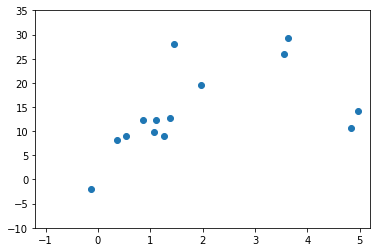

In [544]:
#true model parameters
beta_true = np.asarray([1, 10, -0.5, 0.25, -0.1])

np.random.seed(50) ##to produce the same result each time, comment this line for a truely difference sample
no_of_points = 14

x = np.random.uniform(-1,5,no_of_points)
A_true= create_basis(x, degree=4)
y = np.dot(A_true,beta_true)
y += 4*np.random.normal(0,1,len(y)) #add a normally distributed noise with standard deviation of 4 (variance of 16)
plt.scatter(x,y)

#set plot limits for using later
x_lim = np.asarray([-1.2,5.2]) 
y_lim = np.asarray([-10,35])
plt.xlim(x_lim)
plt.ylim(y_lim)

plt.show()

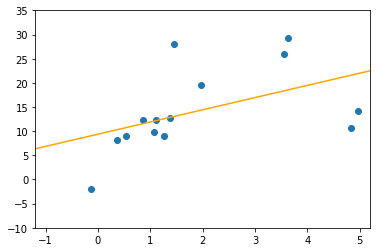

In [496]:
#least square model
plt.scatter(x,y)

A_linear = create_basis(x, degree=1)
beta_linear = np.dot(np.dot(np.linalg.inv((np.dot(A_linear.T, A_linear))), A_linear.T), y)

x_lim_lin = x_lim
A_lim_lin = create_basis(x_lim_lin, degree=1)
y_lim_lin = np.dot(A_lim_lin, beta_linear)

plt.plot(x_lim_lin, y_lim_lin, c="orange")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

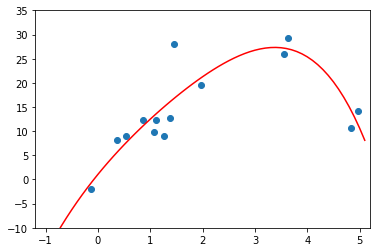

In [497]:
#least square model for regression with 4th degree polynomial basis expansion
plt.scatter(x,y)

A_poly4 = create_basis(x, degree=4)
beta_poly4 = np.dot(np.dot(np.linalg.inv((np.dot(A_poly4.T, A_poly4))), A_poly4.T), y)

x_lim_p4 = np.arange(x_lim[0], x_lim[1], 0.1)
A_lim_p4 = create_basis(x_lim_p4, degree=4)
y_lim_p4 = np.dot(A_lim_p4, beta_poly4)

plt.plot(x_lim_p4, y_lim_p4, c="red")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

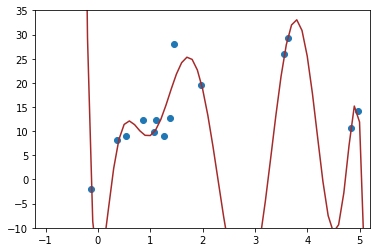

In [498]:
#least square model for regression with 9th degree polynomial basis expansion
plt.scatter(x,y)

A_poly9 = create_basis(x, degree=9)
beta_poly9 = np.dot(np.dot(np.linalg.inv((np.dot(A_poly9.T, A_poly9))), A_poly9.T), y)

x_lim_p9 = np.arange(x_lim[0], x_lim[1], 0.1)#np.arange(min(x), max(x), 0.1)
A_lim_p9 = create_basis(x_lim_p9, degree=9)
y_lim_p9 = np.dot(A_lim_p9, beta_poly9)


plt.plot(x_lim_p9, y_lim_p9, c="brown")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

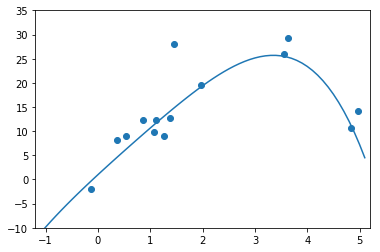

In [499]:
#true model before adding noise
plt.scatter(x,y)

x_lim_true = np.arange(x_lim[0], x_lim[1], 0.1)
A_lim_true= create_basis(x_lim_true, degree=4)
y_true_model = np.dot(A_lim_true, beta_true)

plt.plot(x_lim_true, y_true_model)

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

#### Example 2: Ridge Regression (Run Example 1 to get the same model)

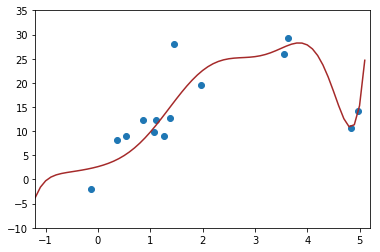

In [500]:
#least square model for regression with 9th degree polynomial basis expansion, with regularizaion
plt.scatter(x,y)

A_poly9 = create_basis(x, degree=9)

lambda_ = 4
beta_poly9 = np.dot(A_poly9.T, A_poly9) + lambda_*np.eye(A_poly9.shape[1]);
beta_poly9 = np.linalg.inv(beta_poly9)
beta_poly9 = np.dot(beta_poly9, A_poly9.T)
beta_poly9 = np.dot(beta_poly9, y)

x_lim_p9 = np.arange(x_lim[0], x_lim[1], 0.1)#np.arange(min(x), max(x), 0.1)
A_lim_p9 = create_basis(x_lim_p9, degree=9)
y_lim_p9 = np.dot(A_lim_p9, beta_poly9)


plt.plot(x_lim_p9, y_lim_p9, c="brown")

plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

#### Example 3: Linear Regression using batch gradiend descent

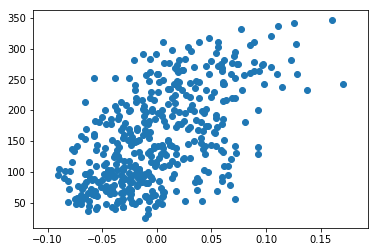

In [546]:
#load the diabetes dataset from sklearn.datasets
diabetes = datasets.load_diabetes()

#use only one feature
x_diabetes = diabetes.data[:, 2]
y_diabetes = diabetes.target

plt.scatter(x_diabetes, y_diabetes)
plt.show()

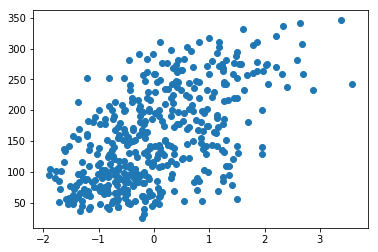

In [550]:
#standardize training data
x_mean = x_diabetes.mean()
x_std = x_diabetes.std()
x_diabetes = (x_diabetes - x_mean) / x_std

plt.scatter(x_diabetes, y_diabetes)
plt.show()

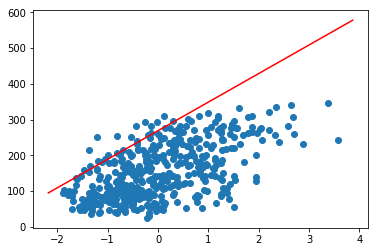

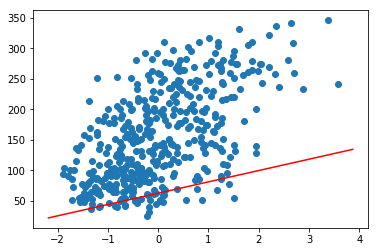

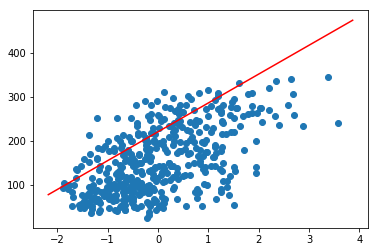

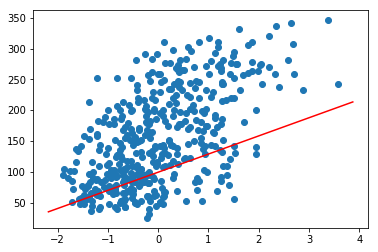

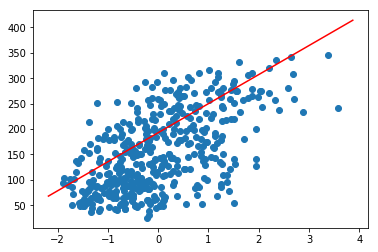

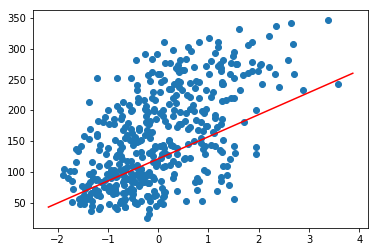

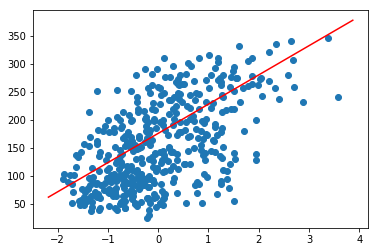

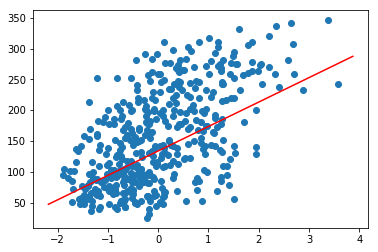

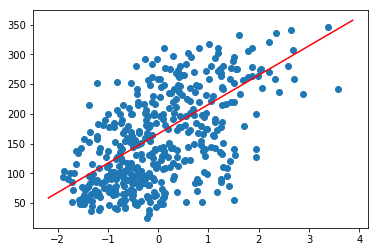

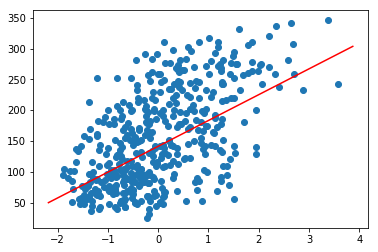

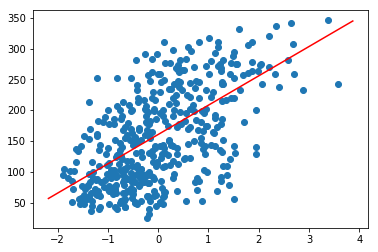

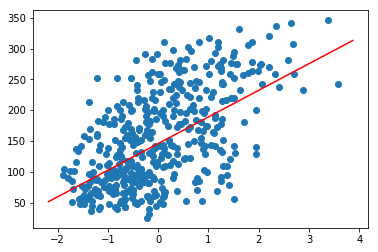

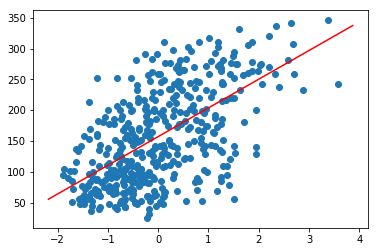

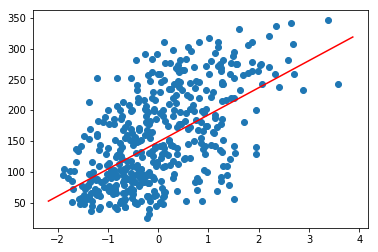

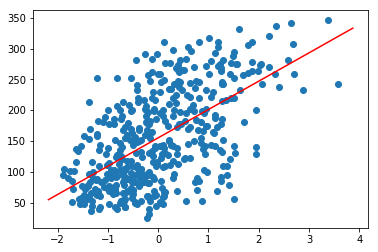

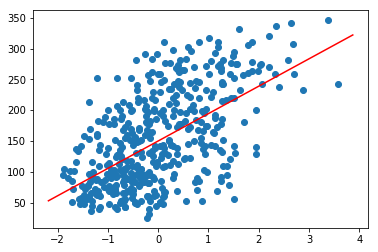

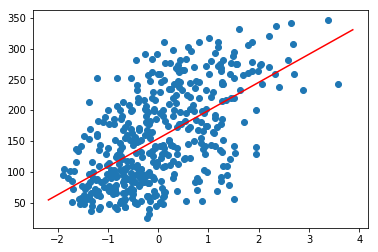

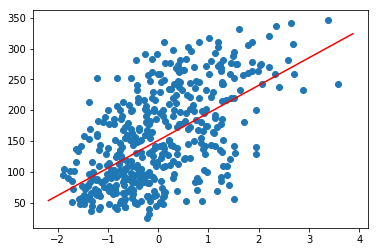

In [617]:
learning_rate = 0.002
beta_old = np.random.uniform(0,0.2,2)
update = 10

while (update > 4):
    X_diabetes = create_basis(x_diabetes, degree=1)
    gradient_loss = np.asarray(2 * np.dot(np.dot(X_diabetes.T, X_diabetes), beta_old) - 2 * np.dot(X_diabetes.T, y_diabetes))
    beta_new = beta_old - learning_rate * gradient_loss
    update = sum(abs(beta_new - beta_old))
    beta_old = beta_new
    
    plt.scatter(x_diabetes, y_diabetes)
    
    x_lim_ = plt.gca().get_xlim()
    A_lim_ = create_basis(x_lim_, degree=1)
    y_lim_ = np.dot(A_lim_, beta_new)

    plt.plot(x_lim_, y_lim_, c="red")
    
    plt.show()


### Exercises

#### Exercise 1: Linear Regression using stochastic gradiend descent
Repeat example 3 using stochastic gradient descent

In [621]:
learning_rate = 0.002
beta_old = np.random.uniform(0,0.2,2)
update = 10

while (update > 4):
    ####
    # Write Code Here #
    break #remove this
    ####
    
    plt.scatter(x_diabetes, y_diabetes)
    
    x_lim_ = plt.gca().get_xlim()
    A_lim_ = create_basis(x_lim_, degree=1)
    y_lim_ = np.dot(A_lim_, beta_new)

    plt.plot(x_lim_, y_lim_, c="red")
    
    plt.show()


#### Exercise 2: Ridge Regression with 3rd order polynombial basis using stochastic gradient descent
Repeat Exercise 1 using 3rd order polynomial basis expansion using ridge regression

In [621]:
learning_rate = 0.002
beta_old = np.random.uniform(0,0.2,2)
update = 10

while (update > 4):
    ####
    # Write Code Here #
    break #remove this
    ####
    
    plt.scatter(x_diabetes, y_diabetes)
    
    x_lim_ = plt.gca().get_xlim()
    A_lim_ = create_basis(x_lim_, degree=1)
    y_lim_ = np.dot(A_lim_, beta_new)

    plt.plot(x_lim_, y_lim_, c="red")
    
    plt.s how()
